In [1]:
#hide
from utils import *
hc(
    "D$4$C - An algorithm to measure aperiodicity of an audio signal",

)

## Quest

1. What is D4C?
2. What is aperiodicity?
3. What physical information does it contain?
4. How can we compute it using D4C algorithm?
5. Which applications can benefit from aperiodicity?

## Source

[D4C, a band-aperiodicity estimator for high-quality speech synthesis](https://www.sciencedirect.com/science/article/pii/S0167639316300413)

## Background



## D4C

Traditionally, speech synthesizers (or vocoders) relied on the fundamental frequency and spectral envelope to generate speech. To achieve higher quality and more natural-sounding synthesis, modern approaches also incorporate an aperiodicity parameter. One such algorithm for estimating band aperiodicity is called D4C which is used in the *WORLD* vocoder software.

## Aperiodicity


A voiced signal $y(t)$

In [2]:
import numpy as np
import modusa as ms

T0 = 0.01 # Sampling Period

def delta(t, T):
    """
    Delta function.

    Parameters
    ----------
    
    
    """
    y = np.zeros(N)
    y[n] = 1
    return y

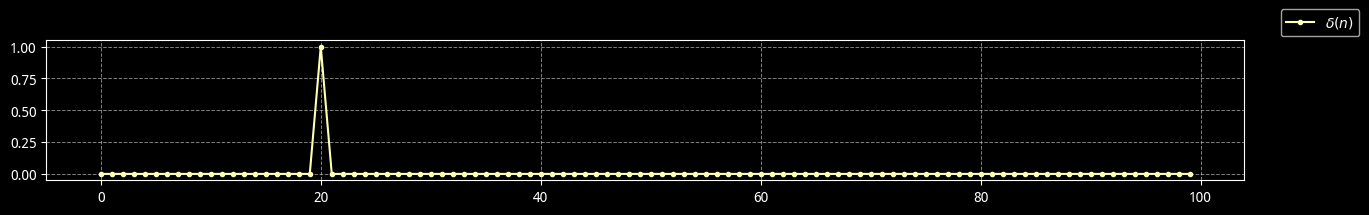

In [8]:
fig = ms.fig("s")
fig.add_signal(delta(20, 100), m="o", label="$\\delta (n)$")
fig.add_legend()

In [94]:
#hide
def compute_spec(y, sr, N=1024, H=160, gamma=10):
    """
    Compute log-compressed power spectrogram.

    Parameters
    ----------
    y: ndarray
        - Audio signal.
    sr: float | int
        - Sampling rate of the audio signal.
    gamma: number (> 1)
        - Log compression factor
    """
    import librosa

    S = librosa.stft(y, n_fft=N, win_length=N, hop_length=H)
    S = np.log(1 + gamma*(np.abs(S)**2))
    S_f = np.arange(S.shape[0]) * (sr / N)
    S_t = np.arange(S.shape[1]) * (H / sr)

    return S, S_f, S_t

In [123]:
def generate_signal_with_harmonics(dur=1, sr=16000, f0=100, n_harmonics=10, skip_harmonics=0):
    """
    Generate a periodic signal at
    f0 along with its harmonics.

    Parameters
    ----------
    dur: Number (> 0)
        - Duration of the signal in sec.
        - Default: 1 sec
    sr: Number (> 0)
        - Sampling rate of the signal
        - Default: 16000 Hz
    f0: Number (> 0)
        - Fundamental frequency in Hz.
        - Default: 100 Hz
    n_harmonics: int (> 0)
        - Number of harmonics of the f0.
        - Default: 10 => 1f0, 2f0, ..., 10f0
    skip_harmonics: int (> 0)
        - If harmonics are to be skipped.
        - For ex. 1 means 1f0, 3f0, ...
        - Default: 0
    """
    N = dur * sr # Number of samples
    
    t = np.arange(N) / sr
    y = np.zeros_like(t)
    for n in range(1, n_harmonics+1, skip_harmonics+1):
        f = n * f0
        y += np.sin(2 * np.pi * f * t)

    return y, t

In [135]:
y, t = generate_signal_with_harmonics(f0=100, n_harmonics=20, skip_harmonics=3)

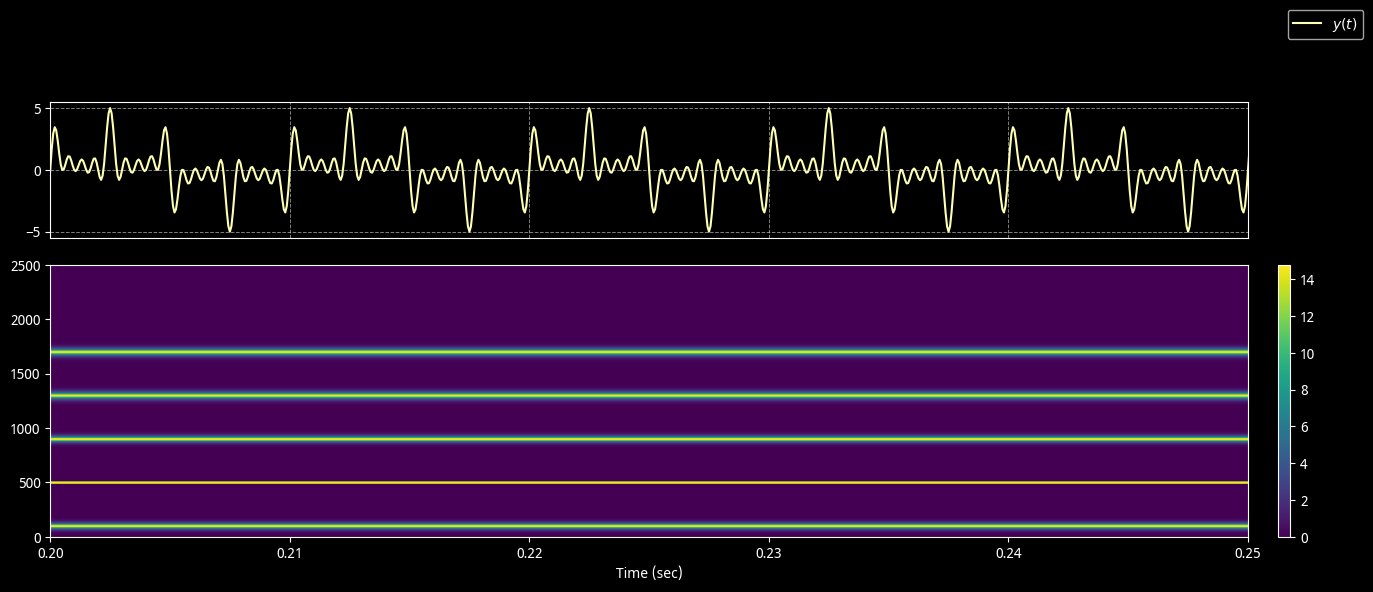

In [136]:
fig = ms.fig("sm", xlim=(0.2, 0.25))
fig.add_signal(y, t, label="$y(t)$")
fig.add_matrix(*compute_spec(y, sr, N=2048), o="lower", ylim=(0, 2500), grid=False)
fig.add_xlabel("Time (sec)")
fig.add_legend()

In [138]:
ms.play(y, sr)